<a href="https://colab.research.google.com/github/jm20389/cmt307-g12/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=red> CMT307 Applied Machine Learning </font>
<a class="anchor" id="main_title"></a>
## Coursework 2 - 2021-2022 Spring semester
### Group 12
Github repository: [cmt307-g12](https://github.com/jm20389/cmt307-g12)

| Name     | Surname  | Student number | e-mail                                                                    |
|----------|----------|----------------|---------------------------------------------------------------------------|
| Matthew  | Esposito | 1845089        | [EspositoMD1@cardiff.ac.uk](mailto:EspositoMD1@cardiff.ac.uk)             |
| Chuntong | Huang    | 21088486       | [HuangC31@cardiff.ac.uk](mailto:HuangC31@cardiff.ac.uk)                   |
| Matthew  | Jepson   | 1723843        | [JepsonMW@cardiff.ac.uk](mailto:JepsonMW@cardiff.ac.uk)                   |
| Guoyi    | Jia      | 2023373        | [JiaG@cardiff.ac.uk](mailto:JiaG@cardiff.ac.uk)                           |
| Zhicong  | Tang     | 21112568       | [TangZ19@cardiff.ac.uk](mailto:TangZ19@cardiff.ac.uk)                     |
| Hekang   | Zhang    | 21040520       | [ZhangH120@cardiff.ac.uk](mailto:ZhangH120@cardiff.ac.uk)                 |
| Xiaoling | Zhu      | 21105789       | [ZhuX41@cardiff.ac.uk](mailto:ZhuX41@cardiff.ac.uk)                       |
| Jose     | Mendoza  | 21015647       | [mendoza-jimenezjc@cardiff.ac.uk](mailto:mendoza-jimenezjc@cardiff.ac.uk) |

<a class="anchor" id="index"></a>
Contents
======
***
*Note: Dynamic links were set up to run on Jupyter Notebook and may not work on Google Colab or Github.*
## [0. Project setup](#0)
<br/>

### [0.1 Import required modules](#0_1)

### [0.2 Source train and test image files](#0_2)
<br/>

### [0.3 Training set](#0_3)
#### [0.3.1 Obtain category names](#0_3_1)
#### [0.3.2 Label all training pictures](#0_3_2)
#### [0.3.3 Create a function to decode all ppm pictures from a given directory into a numpy array](#0_3_3)
#### [0.3.4 Build training dataset](#0_3_4)
#### [0.3.5 Create a summary file for exploratory data analysis](#0_3_5)
<br/>

### [0.4 Test set](#0_4)

### [0.5 Function to test picture display, given an array object](#0_5)



<br/>

***
## [1. Descriptive analysis of the dataset + Error analysis](#1)
<br/>

### [1.0. Data load](#1_0)
### [1.1. Exploratory data analysis](#1_1)
<br/>

### [1.2. Data visualization](#1_2)
#### [1.2.1 Average picture area](#1_2_1)
#### [1.2.2 Number of pictures per category](#1_2_2)
#### [1.2.3 Boxplot of picture intensity per category](#1_2_3)
#### [1.2.4 Distribution of pixel intensity per category](#1_2_4)
#### [1.2.5 Visualize 5 random pictures](#1_2_5)

<br/>

***
## [2. Preprocessing + Literature review](#2)
<br/>

### [2.1 Data pre-processing](#2_1)
#### [2.1.1 Resize pictures](#2_1_1)
#### [2.1.2 Shuffle train pictures](#2_1_2)
#### [2.1.3 Split training set into tran and validation set](#2_1_3)
<br/>

### [2.2 Literature review](#2_2)

<br/>

***
## [3. Implementation + results](#3)
<br/>

### [3.1 Model implementation](#3_1)
#### [3.1.1. CNN arquitechture ](#3_1_1)

<br/>

### [3.2 Model training and parameter tuning](#3_2)

### [3.3 Performance review](#3_3)

<br/>


Initial discussion and project scope

***
# 0 Project setup
<a class="anchor" id="0"></a>
#### [Return to index](#main_title)
<br/>



## 0.0 How to run this script:

You found this script inside the folder *cmt307-g12*.<br/>
For this script to run, you must include a **data** folder inside the same directory (*cmt307-g12* folder).The **data** folder can be downloaded using this link:

https://cf-my.sharepoint.com/:f:/g/personal/mendoza-jimenezjc_cardiff_ac_uk/EoB0DfS8H_BJi1zNCLRflaIBlJUCf2_NRco5yRzg5gAN_w

<br/>

If for whatever reason the link above doesn't work, you could also find the **data** folder in the [github repository](https://github.com/jm20389/cmt307-g12)

<br/>

Contents of **cmt307-g12** after you include the data folder:

<br/>

|     **Item**     |                                   **Description**                                  | **Required to run** |
|:----------------:|:----------------------------------------------------------------------------------:|:-------------------:|
|    main.ipynb    |                                Present python script                               |         Yes         |
|       data       |                     Folder containing data sources and pictures                    |         Yes         |
|     README.md    |                            README file with instructions                           |          No         |
| requirements.txt | txt file listing required python modules/packages to run the script **main.ipynb** |          No         |


<br/>

This script is capable of detecting whether you are working locally or in Colab, and will adjust the data directory addresses accordingly (section 0.2).

***
<br/>

<br/>

### Option A - Run locally using Jupyter Notebooks:

Download the **data** folder from the above link and paste it inside *cmt307-g12*. 
<br/>
Then the script can be run using Jupyer Notebooks from whatever location.

<br/>

### Option B - Run using Google Colab:

Download the **data** folder from the above link and paste it inside *cmt307-g12*. 
<br/>
For this script to run in Google Colab, **the folder cmt307-g12 must be placed in the ROOT of your Google Drive:**
<br/>
%cd /content/gdrive/MyDrive
<br/>

<br/>

### Option C - Github repository:

This project has been uploaded to github as a repository. You can **clone** this repository in your local machine or in your Google Drive:
<br/>
https://github.com/jm20389/cmt307-g12

If you run this repository in Google Colab, the **repository folder must be cloned in the ROOT of your Google Drive:**
<br/>


1. In Google Colab, mount your drive first:

- from google.colab import drive
- drive.mount('/content/gdrive')

<br/>

2. Navigate through the Google Drive root:

- %cd /content/gdrive/MyDrive
- !ls

<br/>

3. Clone the repository using Git:

- !git clone https://git_token@github.com/jm20389/cmt307-g12.git

<br/>


***

<br/>

### 0.0.1 The **data** folder structure:
Below there is a description of the contents of the *data* folder you earlier downloaded and included within the *cmt307-g12* folder: 

<br/>

| **Item** |      **Location**      |  **Type** |      **Role**     |                                                              **Description**                                                             | **Required to run** |
|:--------:|:----------------------:|:---------:|:-----------------:|:----------------------------------------------------------------------------------------------------------------------------------------:|:-------------------:|
|     A    |       data/train       | Subfolder |    Data source    |            Folder containing train ppm pictures. Pictures are classified in categories (subfolders 0 to 43 for each category)            |       Required      |
|     B    |        data/test       | Subfolder |    Data source    |                             Folder containing test ppm picutres. Contains pictures from different categories                             |       Required      |
|     C    |       data/numpy       | Subfolder | Checkpoint folder | Folder containing checkpoint files: Numpy arrays corresponding to decoded picture sets: x_train, x_test, x_train_resized, x_test_resized |       Optional      |
|     D    |    data/saved_models   | Subfolder | Checkpoint folder |                 Folder containing checkpoint files: Keras models already trained with decoded ppm pictures (x_train set)                 |       Optional      |
|     E    | data/train_summary.csv |  csv File |  Checkpoint file  |                                                Summary file for exploratory data analysis                                                |       Optional      |
|     F    |      data/Test.csv     |  csv File |    Data source    |                              CSV containing the labels for the test set. Required to build the object y_text                             |       Required      |


***

<br/>

### 0.0.2 Glossary of items (for reference):

<br/>

Below there is a description of the objects used in the present script *main.ipynb*

<br/>

General data contents:

| **Object name**   | **Type** | **Description**              |**Use**|
|:-----------------:|:--------:|:----------------------------:|:---:|
| cmt307g12_dir     | String   |  Project root directory address           |     |
| data_dir          | String   |  data directory address           |     |
| train_dir         | String   |  Directory address for train pictures           |     |
| test_dir          | String   |  Directory address for test pictures          |     |
| class_names       | List     |  List of traffic sign types (different categories). The **index** of each item corresponds to its **category number**  |     |
| x_train           | np.array |  Array where each item is a decoded picture (numpy array) from the **train** set          |     |
| y_train           | np.array |  Array where each item is the category **number**(traffic sign) corresponding to each item in x_train           |     |
| y_train_names     | np.array |  Array where each item is a category **name**, (traffic sign) corresponding to each item in x_train. Obtained using *class_names*           |     |
| x_test            | np.array |  Array where each item is a decoded picture (numpy array) from the **test** set            |     |
| y_test            | np.array |  Array where each item is the category **number**(traffic sign) corresponding to each item in x_test            |     |
| y_test_names      | np.array |  Array where each item is a category **name**, (traffic sign) corresponding to each item in x_test. Obtained using *class_names*           |     |
| x_train_resized   | np.array |  Contents from **x_train** after resizing the pictures to img_width * img_height           |     |
| X_train           | np.array |  Set of **train pictures** retrieved from **x_train**, after splitting x_train into train and validation set           |     |
| Y_train           | np.array |  Array where each item is the category **number**(traffic sign) corresponding to each item in X_train           |     |
| X_val             | np.array |  Set of **validation pictures** retrieved from **x_train**, after splitting x_train into train and validation set           |     |
| Y_val             | np.array |  Array where each item is the category **number**(traffic sign) corresponding to each item in X_val           |     |


<br/>
<br/>

Exploratory data analysis:


| Object name       | Type             | Description | Use |
|:-----------------:|:----------------:|:-----------:|:---:|
| train_summary_df  | pandas dataframe | Summary table for exploratory data analysis. Number of pictures per category       |     |
| df_pixels         | pandas dataframe | Average pixel intensity for each picture in the training set       |     |

<br/>
<br/>

Image classification (Task 3):

| Object name | Type        | Description | Use |
|:-----------:|:-----------:|:-----------:|:---:|
| model       | keras model | CNN model             |     |

<br/>
<br/>

Checkpoint and Debugging tools:

|     **Object name**     | **Type** |                                                **Description**                                                |                   **Use**                   |
|:-----------------------:|:--------:|:-------------------------------------------------------------------------------------------------------------:|:-------------------------------------------:|
|     Recover_x_train     | Function |         Restores the object x_train loading the **checkpoint** file "data/numpy/all_train_images.npy"         |         x_train = Recover_x_train()         |
|     Recover_y_train     | Function |         Restores the object y_train loading the **checkpoint** file "data/numpy/all_train_labels.npy"         |         y_train = Recover_y_train()         |   
|     Recover_x_test      | Function |          Restores the object x_test loading the **checkpoint** file "data/numpy/all_test_images.npy"          |          x_test = Recover_x_test()          |
|     Recover_y_test      | Function |         Restores the object y_test loading the **checkpoint** file "data/numpy/all_test_labels.npy"           |         y_test = Recover_y_test()           |  
| Recover_x_train_resized | Function | Restores the object x_train_resized loading the **checkpoint** file "data/numpy/all_train_images_resized.npy" | x_train_resized = Recover_x_train_resized() |
|  Recover_x_test_resized | Function |  Restores the object x_test_resized loading the **checkpoint** file "data/numpy/all_test_images_resized.npy"  |  x_test_resized = Recover_x_test_resized()  |
|  RecoverEverything | Function |  Attemps to recover the whole environment looking for all checkpoints. Variables are defined as global  |  RecoverEverything()  |
|       PlotPicture       | Function |      Displays an array-form picture from x_train or x_test sets (np.array) using pyplot, giving its index     |  Example: PlotPicture(x_train, y_train_names, 1234):|

***

## 0.1 Import required modules
<a class="anchor" id="0_1"></a>
#### [Return to index](#main_title)

In [ ]:
# General modules:
import numpy as np
import os
import sys
import random
from datetime import datetime
import pickle

# Exploratory data analysis:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Data pre-processing
from sklearn.model_selection import train_test_split
from skimage.transform import resize

# Machine learning modules
import tensorflow as tf
import keras


## 0.2 Source train and test image files
<a class="anchor" id="0_2"></a>
#### [Return to index](#main_title)
<br/>
Check if running in Google Colab before determine data directories


### 0.2.1 Define data directory addresses depending on working environment
<a class="anchor" id="0_2_1"></a>
#### [Return to index](#main_title)
<br/>
Check if running in Google Colab before determine data directories

In [ ]:
if 'google.colab' in sys.modules:
    
    from google.colab import drive 
    drive.mount('/content/gdrive')

    cmt307g12_dir = "/content/gdrive/My Drive/cmt307-g12/"
    data_dir = "/content/gdrive/My Drive/cmt307-g12/data/" 
    train_dir = "/content/gdrive/My Drive/cmt307-g12/data/train/"
    test_dir = "/content/gdrive/My Drive/cmt307-g12/data/test/"
    numpy_dir = "/content/gdrive/My Drive/cmt307-g12/data/numpy/"
    saved_models_dir = "/content/gdrive/My Drive/cmt307-g12/data/saved_models/"
    saved_history_dir = "/content/gdrive/My Drive/cmt307-g12/data/saved_history/"
    saved_csv_logger_dir = "/content/gdrive/My Drive/cmt307-g12/data/saved_csv_logger/"

else:
    cmt307g12_dir = ""
    data_dir = "data/"
    train_dir = "data/train/"
    test_dir = "data/test/"
    numpy_dir = "data/numpy/"
    saved_models_dir = "data/saved_models/"
    saved_history_dir = "data/saved_history/"
    saved_csv_logger_dir = "data/saved_csv_logger/"
    

Mounted at /content/gdrive


### 0.2.2 Define **checkpoint** and debugging functions from previous notebook runs
<a class="anchor" id="0_2_2"></a>
#### [Return to index](#main_title)
<br/>

The *data* folder contains a subfolder called *numpy*, this folder stores .npy files from previous runs of this notebook, which work as **checkpoints**. If these .npy files are present at the time of running subsequent sections, the objects will be loaded instead of being built from the data sources data/train and data/test:


|    **Object**   |      **Checkpoint file**     |   **Restoring function**  |
|:---------------:|:----------------------------:|:-------------------------:|
|     x_train     |     all_train_images.npy     |     Recover_x_train()     |
|     y_train     |     all_train_labels.npy     |     Recover_y_train()     |
|      x_test     |      all_test_images.npy     |      Recover_x_test()     |
|      y_test     |      all_test_labels.npy     |      Recover_y_test()     |
| x_train_resized | all_train_images_resized.npy | Recover_x_train_resized() |
|  x_test_resized |  all_test_images_resized.npy |  Recover_x_test_resized() |
|     X_train     |  all_train_images_split.npy  |     Recover_X_train()     |
|     Y_train     |  all_train_labels_split.npy  |     Recover_Y_train()     |
|      X_val      |   all_val_images_split.npy   |      Recover_X_val()      |
|      Y_val      |   all_val_labels_split.npy   |      Recover_Y_val()      |
|   class_names   |        class_names.txt       |   Recover_class_names()   |

In [ ]:
# Checkpoint and debug functions to load objects saved in the data folder data/numpy/ :

def Recover_class_names():
    try:
      with open(numpy_dir + "class_names.txt") as class_file:
          class_names = class_file.read().split("\n")
      print('class_names recovered')
      return class_names
    
    except:
      print('Failed to recover class_names')
      return None


def Recover_y_train():
  try:
    print('y_train recovered')
    return np.load(numpy_dir + "all_train_labels.npy", allow_pickle=True)

  except:
    print('Failed to recover y_train')
    return None


def Recover_x_train():
  try:
    print('x_train recovered')
    return np.load(numpy_dir + "all_train_images.npy", allow_pickle=True)

  except:
    print('Failed to recover x_train')
    return None


def Recover_x_test():
  try:
    print('x_test recovered')
    return np.load(numpy_dir + "all_test_images.npy", allow_pickle=True)

  except:
    print('Failed to recover x_test')
    return None

def Recover_y_test():
  try:
    print('y_test recovered')
    return np.load(numpy_dir + "all_test_labels.npy", allow_pickle=True)

  except:
    print('Failed to recover y_test')
    return None


def Recover_X_test():
  try:
    print('X_test recovered')
    return np.load(numpy_dir + "all_test_images_resized.npy", allow_pickle=True)

  except:
    print('Failed to recover X_test')
    return None

def Recover_X_train():
  try:
    print('X_train recovered')
    return np.load(numpy_dir + "all_train_images_split.npy", allow_pickle=True)
  except:
    print('Failed to recover X_train')
    return None


def Recover_X_val():
  try:
    print('X_val recovered')
    return np.load(numpy_dir + "all_val_images_split.npy", allow_pickle=True)

  except:
    print('Failed to recover X_val')
    return None


def Recover_Y_train():
  try:
    print('Y_train recovered')
    return np.load(numpy_dir + "all_train_labels_split.npy", allow_pickle=True)

  except:
    print('Failed to recover Y_train')
    return None


def Recover_Y_val():
  try:
    print('Y_val recovered')
    return np.load(numpy_dir + "all_val_labels_split.npy", allow_pickle=True)

  except:
    print('Failed to recover Y_val')
    return None


# Restore whole working environment loading all objects before section 3 (image classification):

def RecoverEverything():

  # Declare global variables to be available at the global scope:
  global class_names, x_train, y_train, x_test, y_test, X_test, X_train, Y_train, X_val, Y_val
  
  # Recover all script objects by calling their corresponding recovery functions:
  class_names, x_train, y_train, x_test, y_test, X_test, X_train, Y_train, X_val, Y_val= Recover_class_names(), Recover_x_train(), Recover_y_train(), Recover_x_test(), Recover_y_test(), Recover_X_test(), Recover_X_train(), Recover_Y_train(), Recover_X_val(), Recover_Y_val() 


  # Y_test recover (for naming convention)
  try:
    global Y_test
    Y_test = y_test   # Originally was created just for name convention consistency in Section 3
    print('Y_test recovered')
  except:
    print('Failed to recover Y_test')


  # Names from Section 1:
  try:
    global y_train_names
    y_train_names = [class_names[label] for label in y_train]
    print('y_train_names recovered')
  except:
    print('Failed to recover y_train_names')
  
  try:
    global y_test_names
    y_test_names = [class_names[label] for label in y_test]
    print('y_test_names recovered')

  except:
    print('Failed to recover y_test_names')
  

  # Names from Section 2:
  try:
    global Y_train_names
    Y_train_names = [class_names[label] for label in Y_train]
    print('Y_train_names recovered')
  except:
    print('Failed to recover Y_train_names')

  try:
    global Y_val_names
    Y_val_names = [class_names[label] for label in Y_val]
    print('Y_train_names recovered')
  except:
    print('Failed to recover Y_val_names')

  try:
    global Y_test_names # Originally was created just for name convention consistency in Section 3
    Y_test_names = y_test_names
    print('Y_train_names recovered')
  except:
    print('Failed to recover Y_test_names')
  

  # Resizing parameters (input shape for section 3)
  global img_height, img_width, channels
  img_height = 30
  img_width = 30
  channels = 3
  print("img_height, ", "img_width, ", "channels, ", " recovered")


  return None  


# Create a function to check picture display, given an array object:

def PlotPicture(pic_set, pic_labels, index):

  plt.figure()
  plt.imshow(pic_set[index, ], cmap = 'gray')
  plt.title(pic_labels[index])
  plt.show()


## 0.3 Training set
<a class="anchor" id="0_3"></a>
#### [Return to index](#main_title)

In this section, we navigate through the contents of data/train and convert ppm pictures into numpy arrays using pyplot.imread:

### 0.3.1 Obtain category names
<a class="anchor" id="0_3_1"></a>
#### [Return to index](#main_title)
Below there is a python list containing the names of each category (category = traffic sign). The **index** from each item in the list corresponds to its **category number**. For example, category ID 0 corresponds to the traffic sign "Max Speed 20 km/h", category ID 1 corresponds to the traffic sign "Max Speed 30 km/h", etc.

|            **Category name**            | **Category number** |
|:---------------------------------------:|:-------------------:|
|            Max Speed 20 km/h            |          0          |
|            Max Speed 30 km/h            |          1          |
|            Max Speed 50 km/h            |          2          |
|            Max Speed 60 km/h            |          3          |
|            Max Speed 70 km/h            |          4          |
|            Max Speed 80 km/h            |          5          |
|           End of 80 km/h zone           |          6          |
|            Max Speed 100 km/h           |          7          |
|            Max Speed 120 km/h           |          8          |
|                No passing               |          9          |
| No passing for vehicles over 3.5 tonnes |          10         |
|                 Priority                |          11         |
|              Priority road              |          12         |
|                  Yield                  |          13         |
|                   Stop                  |          14         |
|               Road closed               |          15         |
|   Vehicles over 3.5 tonnes prohibited   |          16         |
|               Do not enter              |          17         |
|              General danger             |          18         |
|                Left curve               |          19         |
|               Right curve               |          20         |
|               Double curve              |          21         |
|           Uneven road surface           |          22         |
|        Slippery when wet or dirty       |          23         |
|               Road narrows              |          24         |
|                Roadworks                |          25         |
|          Traffic signals ahead          |          26         |
|               Pedestrians               |          27         |
|            Watch for children           |          28         |
|             Bicycle crossing            |          29         |
|                Ice - snow               |          30         |
|           Wild animal crossing          |          31         |
|         End of all restrictions         |          32         |
|             Turn right ahead            |          33         |
|             Turn left ahead             |          34         |
|                Ahead only               |          35         |
|         Ahead or turn right only        |          36         |
|         Ahead or turn left only         |          37         |
|             Pass by on right            |          38         |
|             Pass by on left             |          39         |
|                Roundabout               |          40         |
|          End of no passing zone         |          41         |
|    End of no passing zone for trucks    |          42         |

In [ ]:
if "class_names.txt" in os.listdir(data_dir + "numpy/"):
  class_names = Recover_class_names()

else:
    
    class_names = [
    "Max Speed 20 km/h",
    "Max Speed 30 km/h",
    "Max Speed 50 km/h",
    "Max Speed 60 km/h",
    "Max Speed 70 km/h",
    "Max Speed 80 km/h",
    "End of 80 km/h zone",
    "Max Speed 100 km/h",
    "Max Speed 120 km/h",
    "No passing",
    "No passing for vehicles over 3.5 tonnes",
    "Priority",
    "Priority road",
    "Yield",
    "Stop",
    "Road closed",
    "Vehicles over 3.5 tonnes prohibited",
    "Do not enter",
    "General danger",
    "Left curve",
    "Right curve",
    "Double curve",
    "Uneven road surface",
    "Slippery when wet or dirty",
    "Road narrows",
    "Roadworks",
    "Traffic signals ahead",
    "Pedestrians",
    "Watch for children",
    "Bicycle crossing",
    "Ice - snow",
    "Wild animal crossing",
    "End of all restrictions",
    "Turn right ahead",
    "Turn left ahead",
    "Ahead only",
    "Ahead or turn right only",
    "Ahead or turn left only",
    "Pass by on right",
    "Pass by on left",
    "Roundabout",
    "End of no passing zone",
    "End of no passing zone for trucks"
    ]

    def Create_class_names(filepath, class_names):

        with open(filepath, 'w+') as output_file:
            for name in class_names:
                if name == class_names[-1]:
                    output_file.write(name)
                else:
                    output_file.write(name + '\n')
                    
        return None


    Create_class_names(numpy_dir + "class_names.txt", class_names)

### 0.3.2 Label all training pictures
<a class="anchor" id="0_3_2"></a>
#### [Return to index](#main_title)


**y_train**:

In [ ]:
if "all_train_labels.npy" in os.listdir(data_dir + "numpy/"):
  y_train = Recover_y_train()
  y_train_names = [class_names[label] for label in y_train]

else:

  y_train = []
  y_train_names = []

  for folder in os.listdir(train_dir):
    
    pictures = [pic for pic in os.listdir(train_dir + "/" + folder) if pic.split(".")[-1] == "ppm" ] # filter out non-ppm files
    
    for picture in pictures:
        y_train_names.append(class_names[int(folder)]) # translates ClassId figure into label name, for example class_names[int(000000)] = 'Max Speed 20 km/h'
        y_train.append(int(folder))
        
  y_train = np.array(y_train)

  np.save(numpy_dir + "all_train_labels.npy" , y_train)
  

### 0.3.3 Create a function to decode all ppm pictures from a given directory into a numpy array
<a class="anchor" id="0_3_3"></a>
#### [Return to index](#main_title)


In [ ]:
#Create a filtered list of .ppm files, then call plt.imread on the resulting list.

def PpmToNumpy(directory):
    
    '''
    Given a host directory containing ppm pictures, converts the pictures into a numpy array, returning an array with the whole list of pictures.

    Params:
    String containing a directory address.

    Returns:
    numpy array whose items are decoded ppm pictures (np.array)

    '''

    files = os.listdir(directory)
    files = [file for file in files if file.split(".")[1] == "ppm"] # to ensure only ppm images are called
    
    return np.array([plt.imread(directory + file) for file in files], dtype=object)
                       

### 0.3.4 Build training dataset
<a class="anchor" id="0_3_4"></a>
#### [Return to index](#main_title)


**x_train**: Look for checkpoints before attempting to decode **train** images:

In [ ]:
if "all_train_images.npy" in os.listdir(data_dir + "numpy/"):
  x_train = Recover_x_train()

else:

  all_images = [ PpmToNumpy(train_dir + folder + "/") for folder in os.listdir(train_dir)]
  x_train = np.concatenate(all_images, axis=0, out=None, dtype=None, casting="same_kind")

  np.save(numpy_dir + "all_train_images.npy" , x_train)

### 0.3.5 Create a summary file for exploratory data analysis (train_summary.csv)
<a class="anchor" id="0_3_5"></a>
#### [Return to index](#main_title)


In [ ]:
# Train summary file:

if "train_summary.csv" not in os.listdir(data_dir):

  train_summary = dict.fromkeys(["Width", "Height", "ClassId"], [])
  widths = []
  heights = []

  for picture in x_train:
      widths.append(picture.shape[0])
      heights.append(picture.shape[1])

  train_summary["Width"] = widths
  train_summary["Height"] = heights
  train_summary["ClassId"] = y_train
  
  train_summary_df = pd.DataFrame( train_summary)
  train_summary_df.to_csv(data_dir + "train_summary.csv", index = False)
  train_summary_df.head(5)

## 0.4 Test set
<a class="anchor" id="0_4"></a>
#### [Return to index](#main_title)

**x_test**: Look for checkpoints before attempting to decode **test** images:

In [ ]:
if "all_test_images.npy" in os.listdir(data_dir + "numpy/"):
  x_test = Recover_x_test()

else:
  x_test = PpmToNumpy(test_dir)

  np.save(numpy_dir + "all_test_images.npy" , x_test)

**y_test**: Look for checkpoints before attempting to load test labels from Test.csv:



In [ ]:
# Build the labels objects for the test set (y_test and y_test_names):

if "all_test_labels.npy" in os.listdir(data_dir + "numpy/"):
  y_test = Recover_y_test()
  y_test_names = np.array([class_names[label] for label in y_test])

else:

  # Labels from the test set are obtained from the file "Test.csv", located in the data folder:

  test_meta = pd.read_csv(data_dir + "Test.csv")

  y_test =  np.array(test_meta["ClassId"])
  y_test_names = np.array(test_meta["ClassId"].apply(lambda x: class_names[x]))

  np.save(numpy_dir + "all_test_labels.npy" , y_test)


## 0.5 Function to test picture display, given an array object:
<a class="anchor" id="0_5"></a>
#### [Return to index](#main_title)

Check the debugging function *PlotPicture* defined at section 0.2 to display a random picture from the test set (x_test):

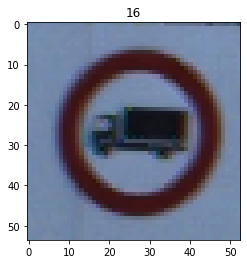

LABEL:  Vehicles over 3.5 tonnes prohibited


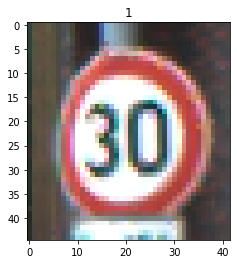

LABEL:  Max Speed 30 km/h


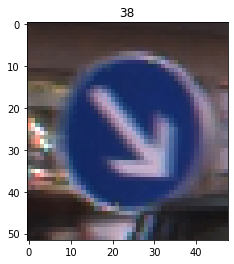

LABEL:  Pass by on right


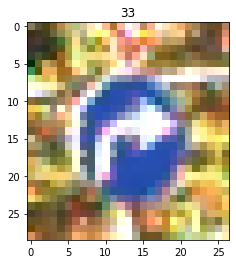

LABEL:  Turn right ahead


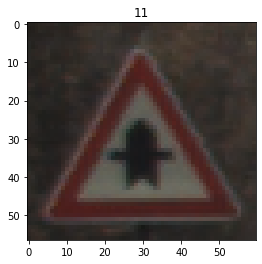

LABEL:  Priority


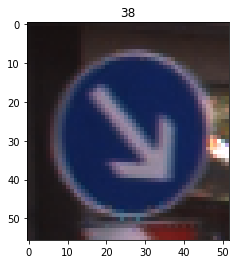

LABEL:  Pass by on right


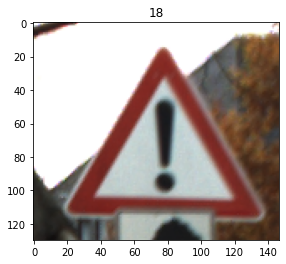

LABEL:  General danger


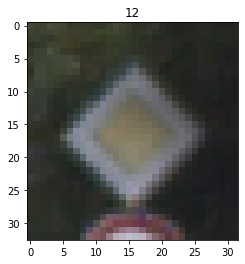

LABEL:  Priority road


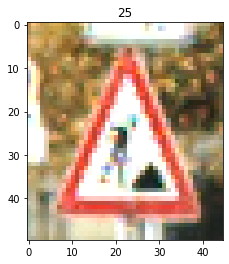

LABEL:  Roadworks


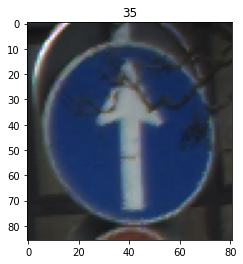

LABEL:  Ahead only


In [ ]:
index = 0

for index in range(10):

  PlotPicture(x_test, y_test, index)
  print('LABEL: ', class_names[y_test[index]])

***
# 1 Descriptive analysis of the dataset + error analysis 
<a class="anchor" id="1"></a>
#### [Return to index](#main_title)
<br/>

The scope of this section is to get a general idea of the whole dataset.
We will start creating a histogram to see how many pictures are available for each category.

## 1.0 Data load 
<a class="anchor" id="1_0"></a>
#### [Return to index](#main_title)
On step 0.3.5 we built a summary dataframe with the training set of pictures: **train_summary.csv**

In [ ]:
train_df = pd.read_csv(data_dir + "train_summary.csv")

test_df = pd.read_csv(data_dir + "Test.csv")

train_df.head()

,Width,Height,ClassId
0,30,29,0
1,30,30,0
2,30,30,0
3,31,31,0
4,32,30,0


In [ ]:
train_df['Area'] = train_df.Height * train_df.Width

train_df.head()

,Width,Height,ClassId,Area
0,30,29,0,870
1,30,30,0,900
2,30,30,0,900
3,31,31,0,961
4,32,30,0,960


## 1.1 Exploratory data analysis 
<a class="anchor" id="1_1"></a>
#### [Return to index](#main_title)
<br/>

##### Create a dataframe with summary data per **category** - *train_df_cat*

In [ ]:
train_df_cat = train_df.groupby('ClassId', as_index=False).mean().sort_values(by='Area', ascending=True)

print(train_df_cat.head())

    ClassId      Width     Height         Area
17       17  40.273874  38.010811  1677.474775
6         6  42.126190  40.404762  1881.604762
42       42  41.291667  41.145833  1885.904167
32       32  41.425000  41.004167  1968.908333
5         5  42.823656  42.515054  2083.274194


## 1.2 Data visualization 
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)

### 1.2.1 Average picture area
<a class="anchor" id="1_2_1"></a>
##### [Return to index](#main_title)
<br/>

Create a **barplot** to explore average picture area:

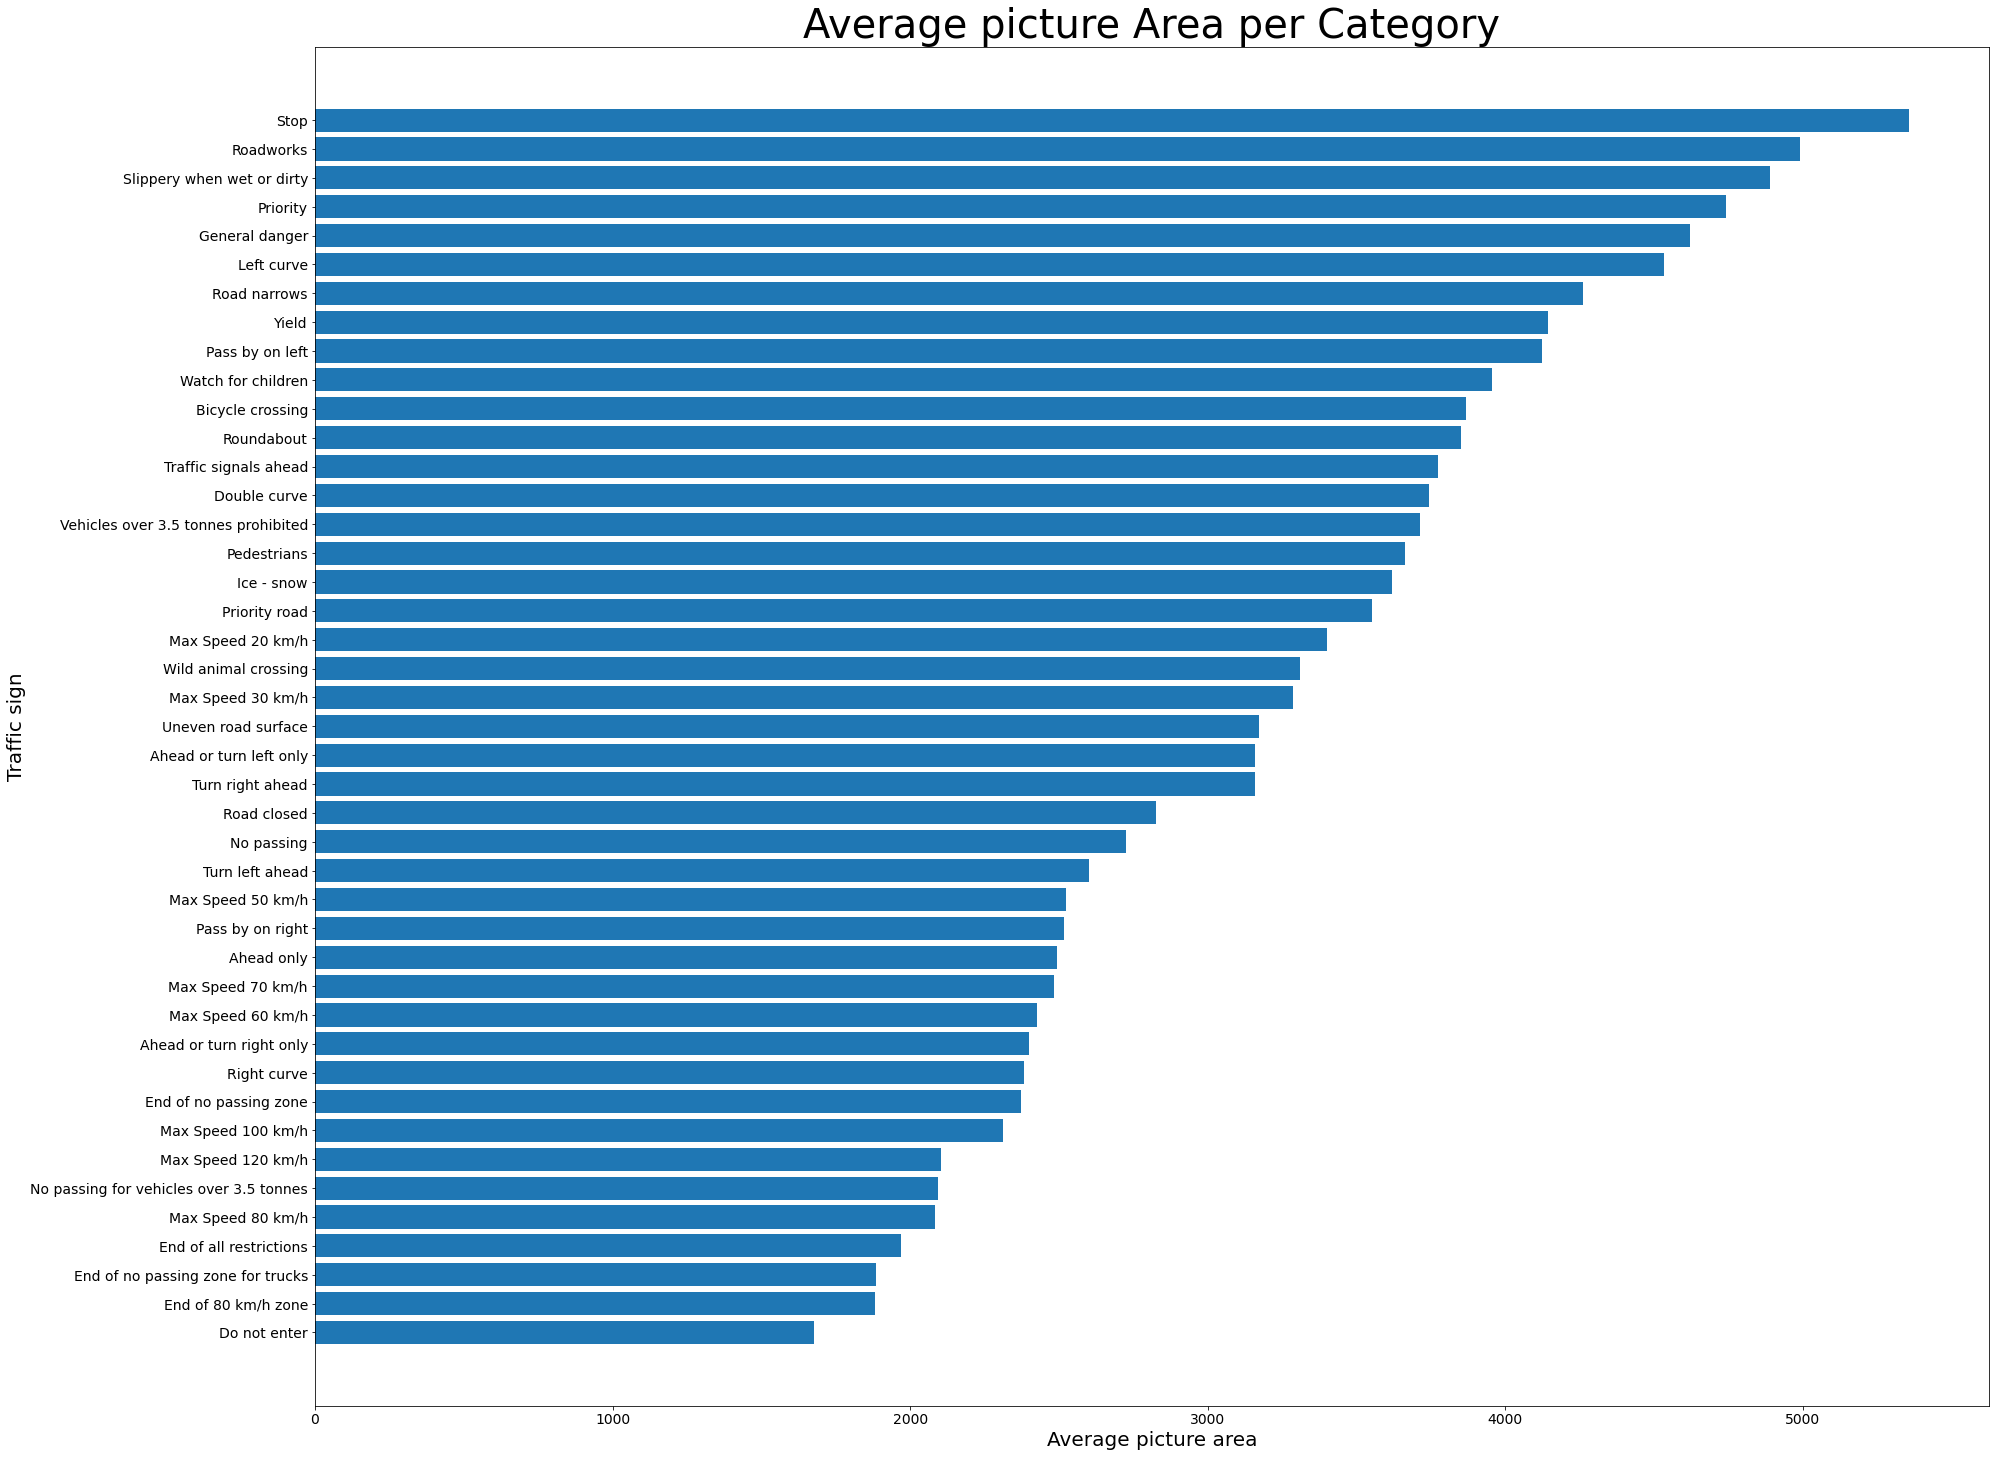

In [ ]:
fig = plt.figure(figsize=(30, 25))
ax=plt.subplot()

plt.barh(range(len(train_df_cat)), train_df_cat['Area'])

plt.title('Average picture Area per Category', fontsize=40)
plt.xlabel('Average picture area', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

labels = [ class_names[i] for i in train_df_cat.index ]
ax.set_yticks(range(len(train_df_cat)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig(cmt307g12_dir + "report/images/area_barplot.png")

plt.show()


### 1.2.2 Number of pictures per category 
<a class="anchor" id="1_2_2"></a>
#### [Return to index](#main_title)
<br/>

Create a **barplot** to explore number of pictures per category:

In [ ]:
train_counts = train_df.ClassId.value_counts().sort_values(ascending = True)

train_counts[:10]

0     210
19    210
37    210
27    240
32    240
42    240
41    240
24    270
29    270
39    300
Name: ClassId, dtype: int64

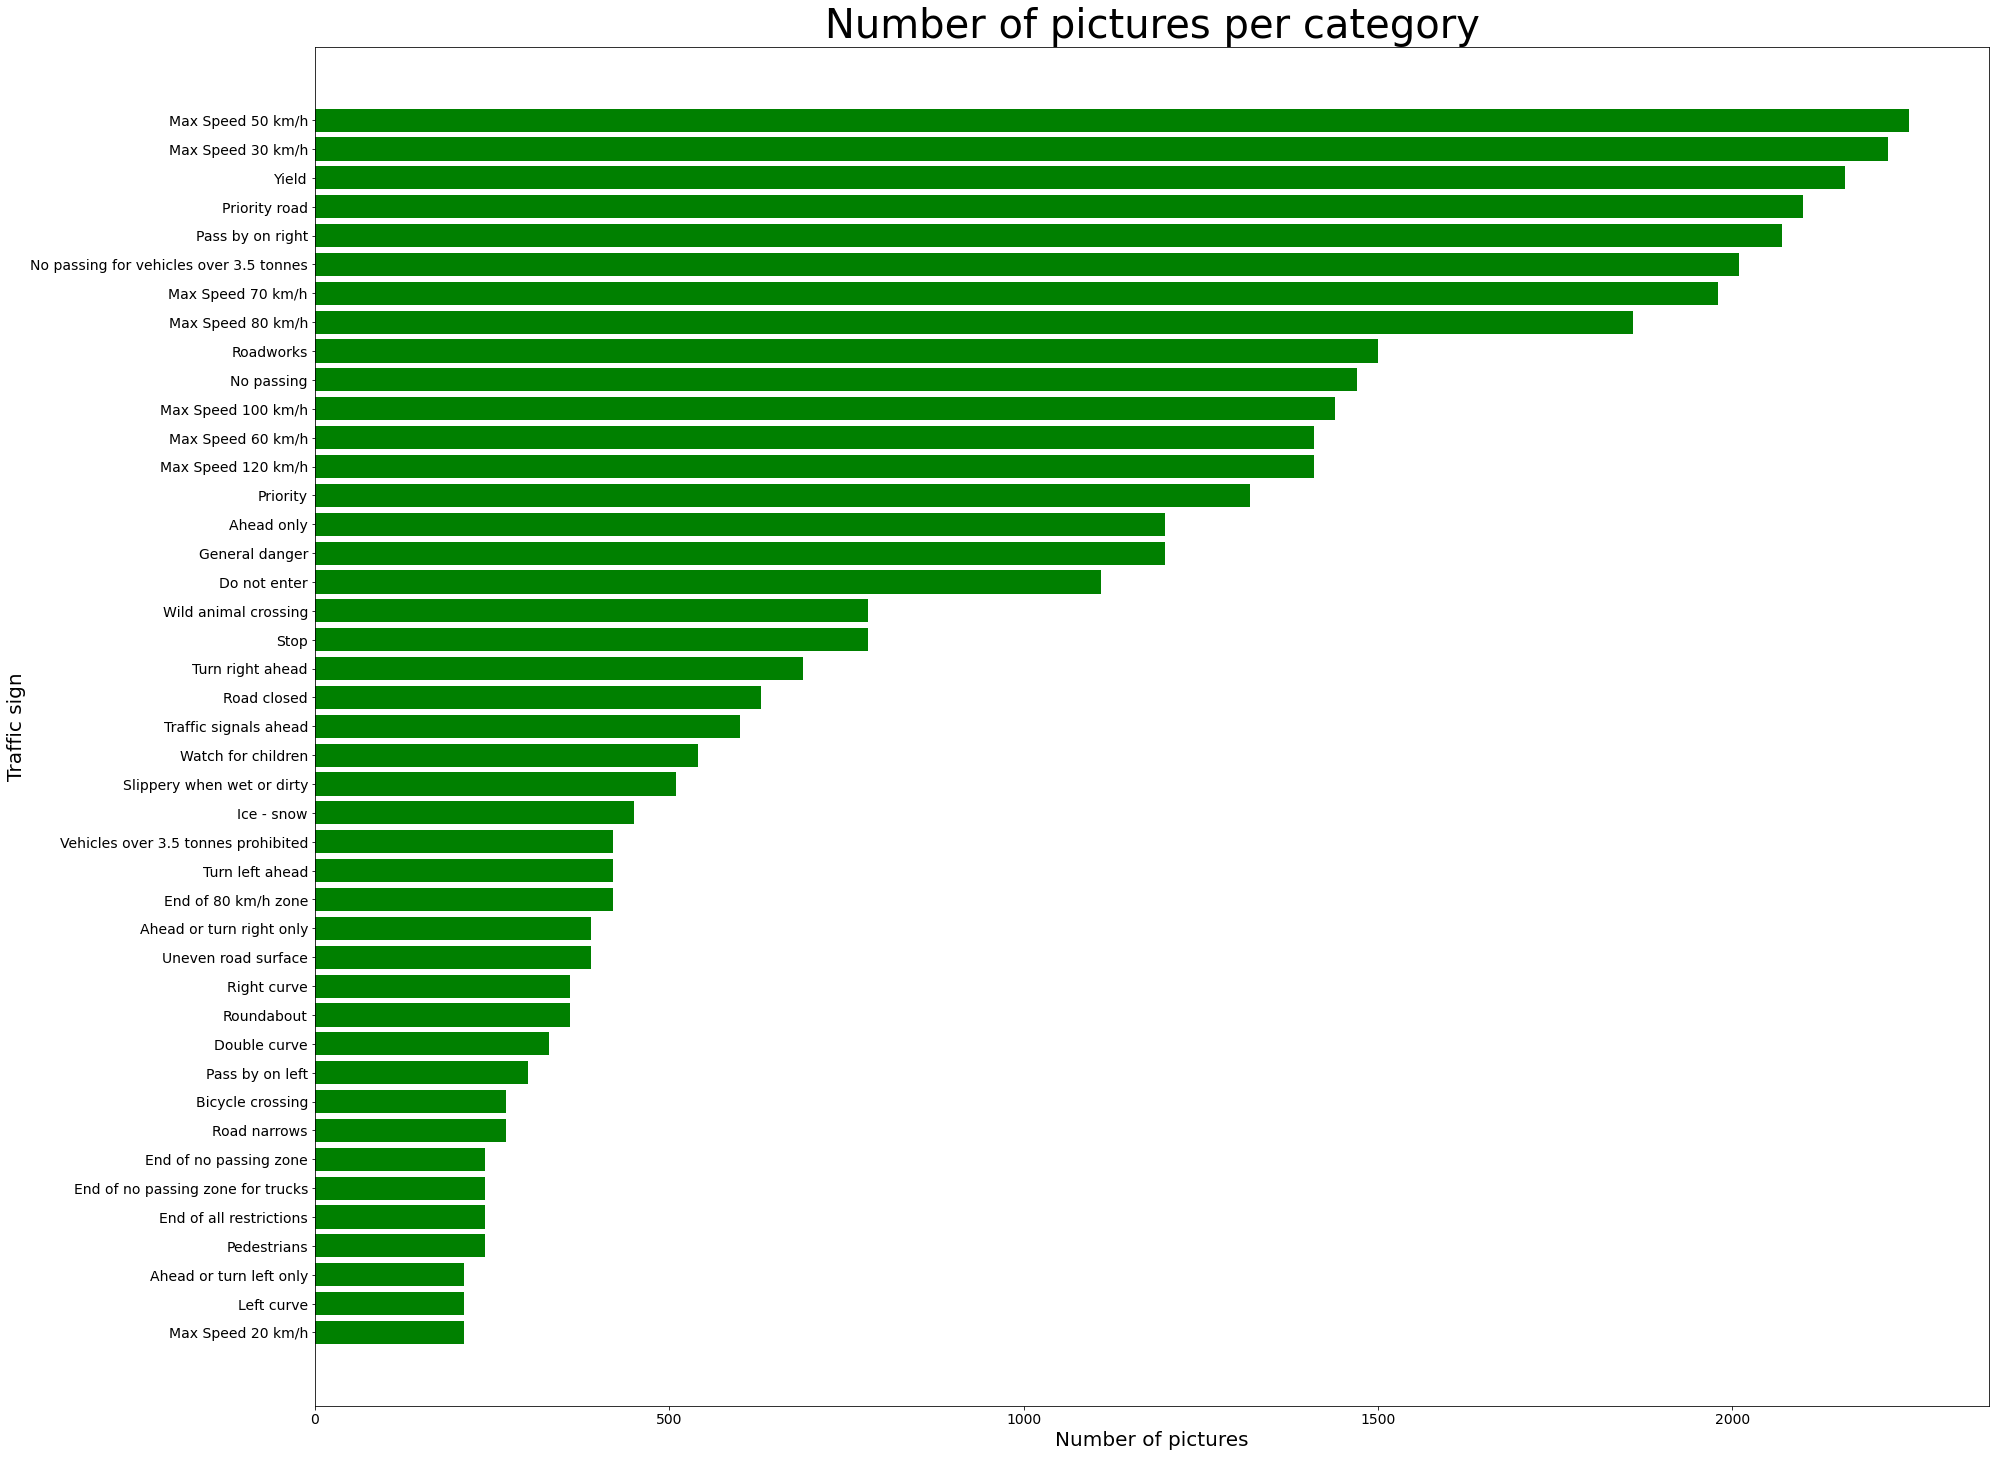

In [ ]:
fig = plt.figure(figsize=(30, 25))
ax=plt.subplot()

plt.barh(range(len(train_counts)), train_counts.values, color = 'green')
plt.title('Number of pictures per category', fontsize=40)
plt.xlabel('Number of pictures', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

labels = [ class_names[i] for i in train_counts.index ]
#labels = train_counts.index

ax.set_yticks(range(len(train_counts)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.savefig(cmt307g12_dir + "report/images/num_pictures_barplot.png")

plt.show()


### 1.2.3 Boxplot of picture intensity per category 
<a class="anchor" id="1_2_3"></a>
#### [Return to index](#main_title)
<br/>

Calculate the average pixel intensity from each picture using its numpy array (x_train) and store this data into a dataframe called df_pixels.

Create a dataframe from decoded train pictures: 
*x_train + y_train -> df_pixels*

In [ ]:
pic_means = [ picture.mean() for picture in x_train]

df_pixels = pd.DataFrame( list(zip(pic_means, y_train_names)), columns=['Picture avg', 'Category']  )


In [ ]:
df_pixels.head(5)

,Picture avg,Category
0,128.588506,Max Speed 20 km/h
1,129.371111,Max Speed 20 km/h
2,127.922593,Max Speed 20 km/h
3,126.164759,Max Speed 20 km/h
4,130.678125,Max Speed 20 km/h


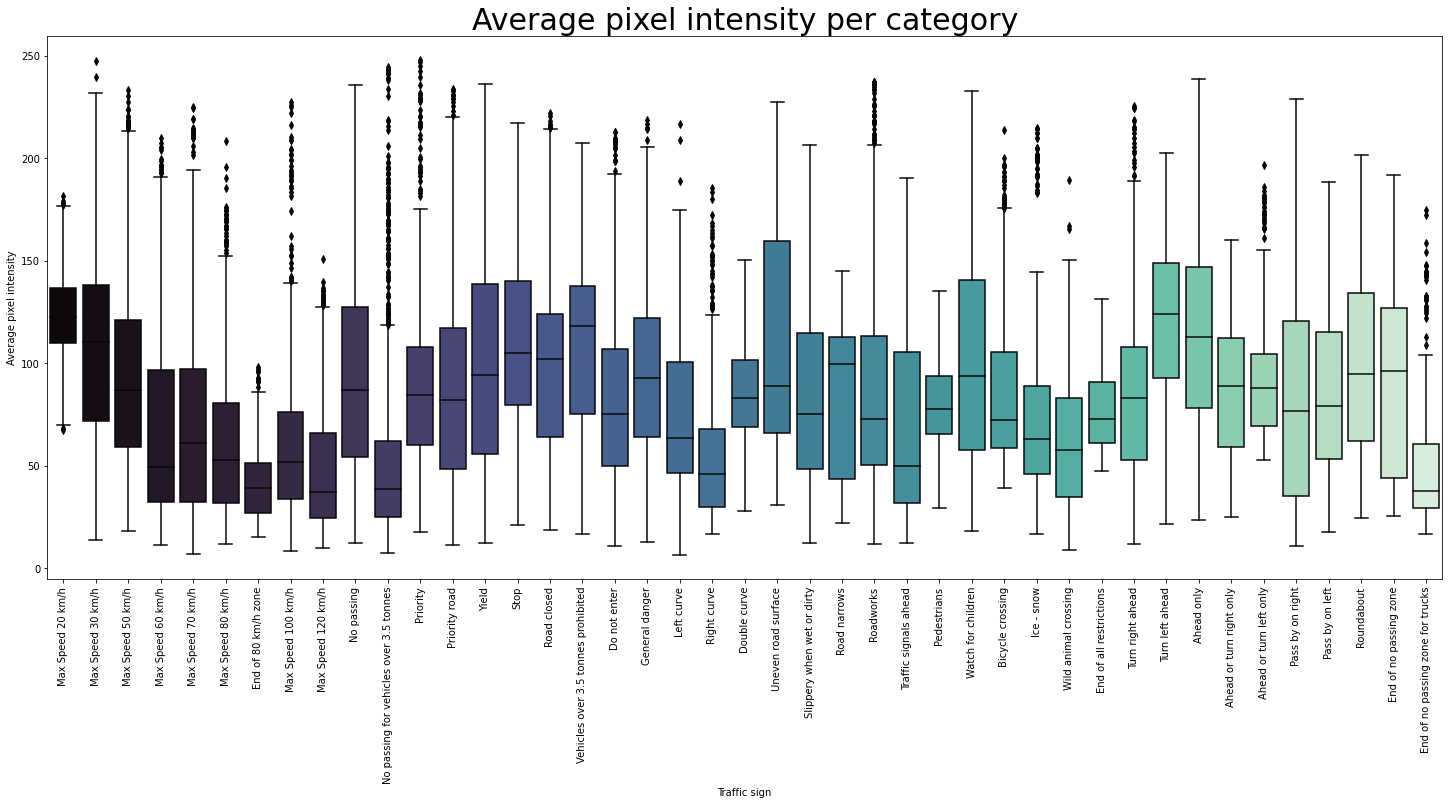

In [ ]:
fig = plt.figure(figsize=(25, 10))
ax=plt.subplot()

sns.boxplot(x = "Category", y = "Picture avg", palette = "mako", data = df_pixels)
plt.title('Average pixel intensity per category', fontsize=30)
plt.xlabel('Traffic sign')
plt.ylabel('Average pixel intensity')

#labels = [ class_names[i] for i in train_counts.index ]
#ax.set_xticks(range(len(train_counts)))
#ax.set_xticklabels(labels, rotation = 90)

plt.xticks(rotation = 90)

plt.savefig(cmt307g12_dir + "report/images/pixel_intensity_barplot.png")

plt.show()

### 1.2.4 Distribution of pixel intensity per category 
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)
<br/>

Distribution of picture's average intensity per category

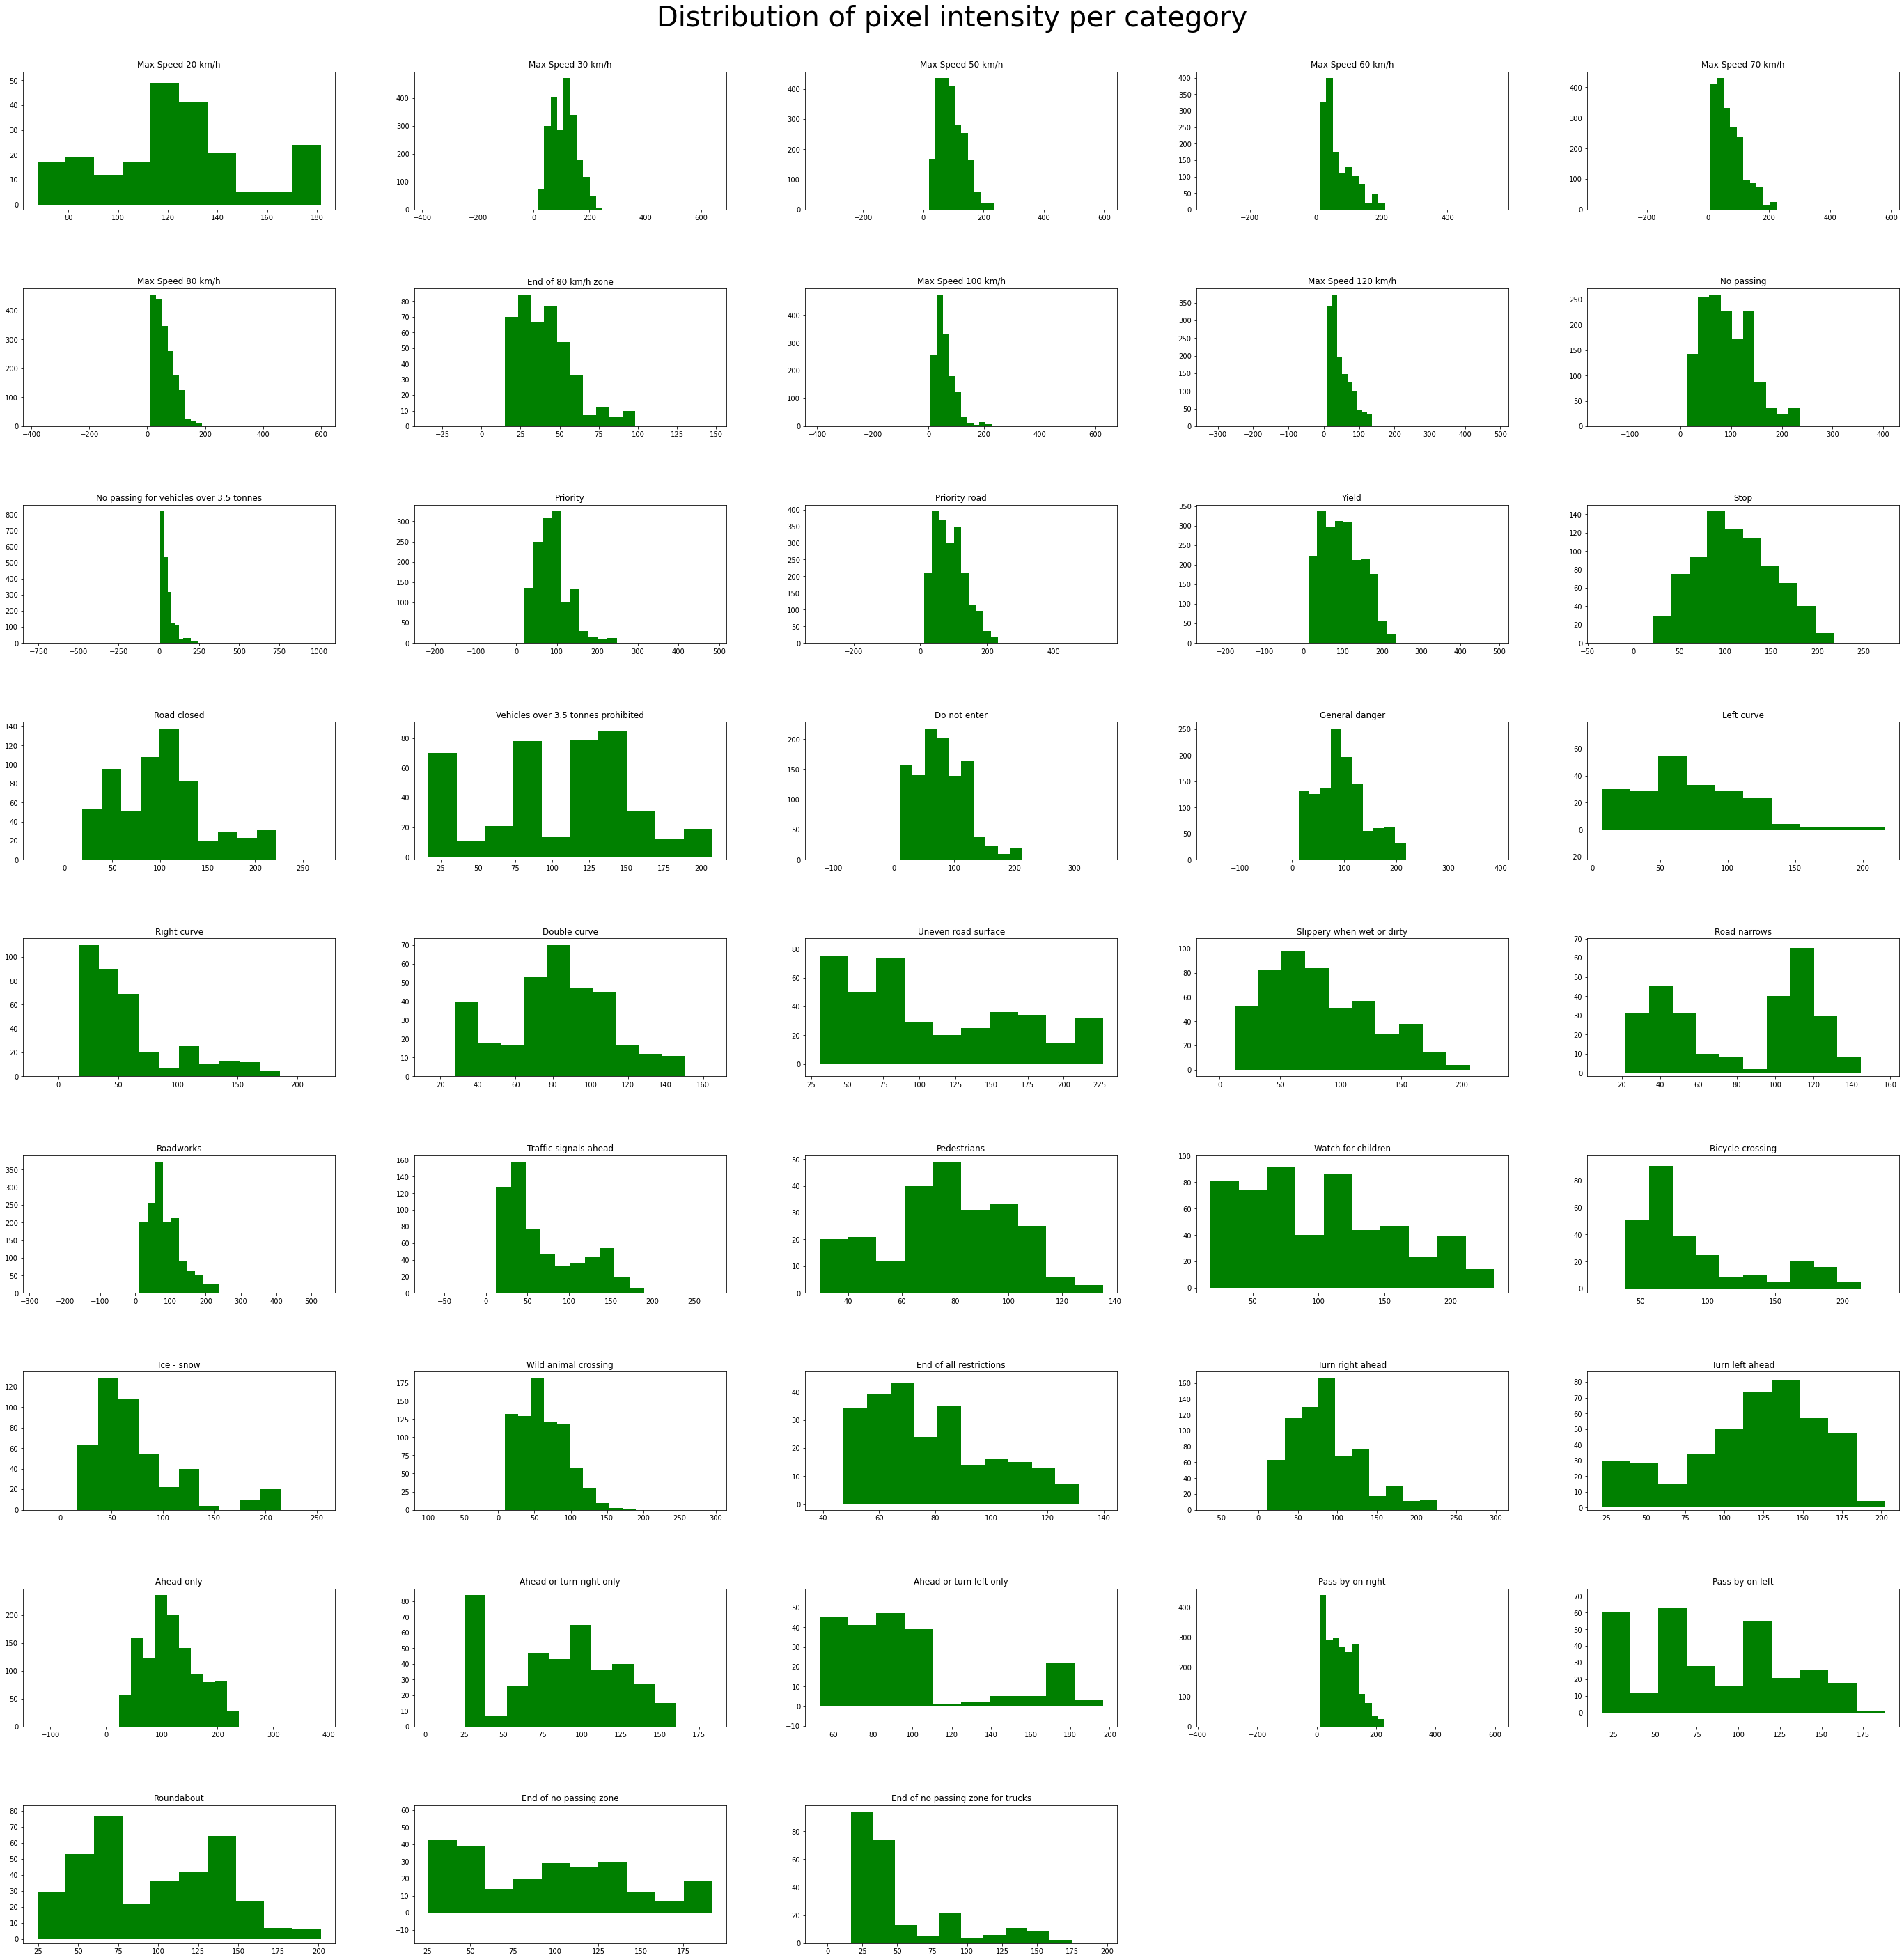

In [ ]:
# Create the main figure:
fig = plt.figure(figsize=(25,25))

# Create a collection of axes names for the following subplot:
axes = [category + "_ax" for category in class_names]

for i in range(len(class_names)) :
    
    axes[i] = fig.add_subplot(9, 5 , i+1)
        
    fig.set_figheight(40)
    fig.set_figwidth(40)
    
    category = class_names[i]
    values = df_pixels[df_pixels.Category == category]["Picture avg"]
    
    axes[i].hist([values], bins = 10, facecolor = 'green')
    #sns.histplot(values)
    
    axes[i].axis('equal')  
    axes[i].set_title(class_names[i])

    
fig.tight_layout(pad=8.0)
fig.suptitle("Distribution of pixel intensity per category", fontsize=40, y= 1.0)

plt.savefig(cmt307g12_dir + "report/images/pixel_intensity_distribution.png")

plt.show()     

### 1.2.5 Visualize 25 random pictures
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)
<br/>

Inspect 25 random pictures from the Test directory

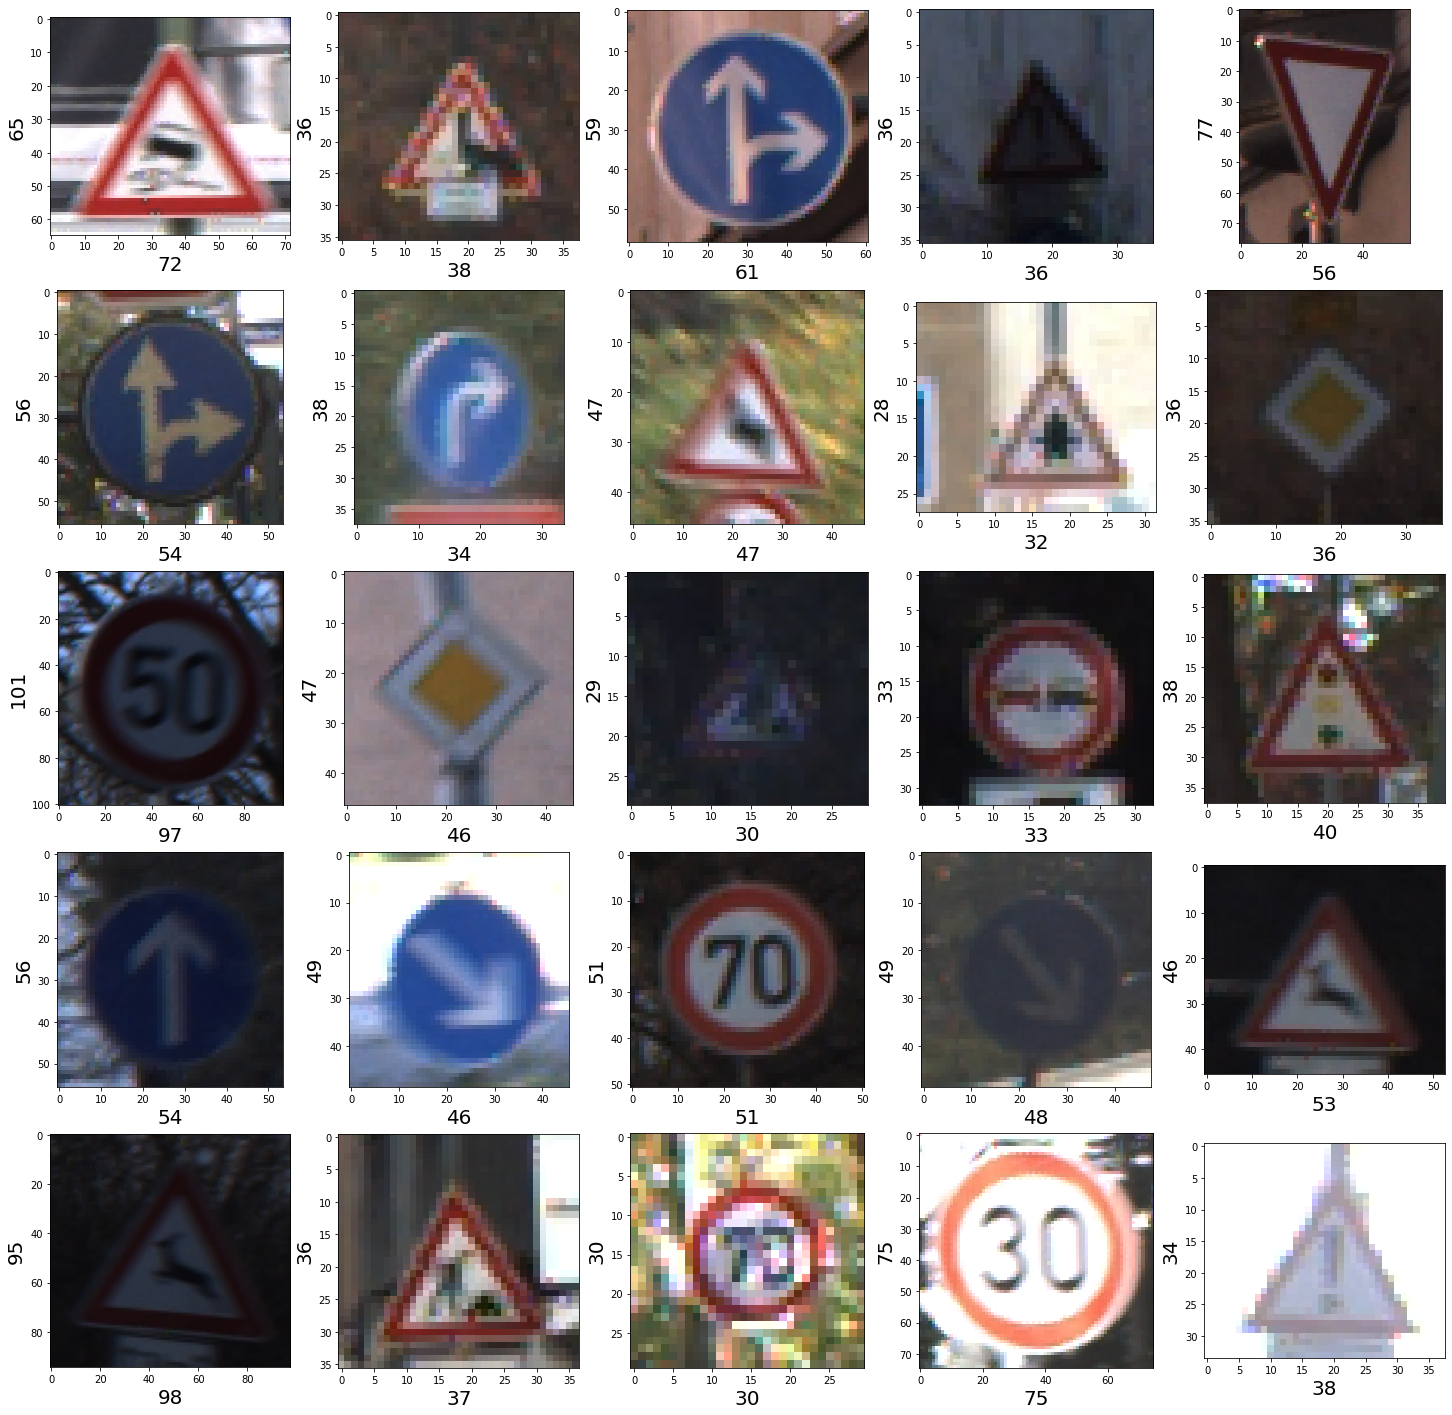

In [ ]:
imgs = os.listdir(test_dir)
from matplotlib.image import imread

plt.figure(figsize=(25,25))

for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_dir + random.choice(imgs)
    rand_img = imread(random_img_path)
    
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image
    
plt.savefig(cmt307g12_dir + "report/images/random_pictures.png")
    

***
# 2 Preprocessing + Literature review 
<a class="anchor" id="2"></a>
#### [Return to index](#main_title)

## 2.1 Dataset preprocessing 
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In this section we normalize the dataset translating pixel intensity from a 0-255 to 0.0-1.0 scale. Then resize all pictures from train and test set to the same size, defined by the parameters img_height and img_width.

### 2.1.1 Resize pictures 
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)


Define **resize** parameters:

In [ ]:
# Target resize parameters:
img_width = 30
img_height = 30
channels = 3

***

**x_train**: resize trainning pictues

Visualize native train pictures:

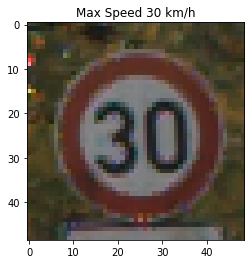

SHAPE:  (49, 49, 3)


array([[[60, 66, 49],
        [56, 64, 45],
        [43, 53, 33],
        ...,
        [55, 56, 36],
        [67, 67, 46],
        [68, 67, 44]],

       [[30, 33, 25],
        [29, 36, 26],
        [28, 40, 27],
        ...,
        [54, 53, 36],
        [60, 60, 44],
        [65, 65, 45]],

       [[72, 72, 50],
        [83, 90, 61],
        [63, 77, 50],
        ...,
        [55, 52, 34],
        [53, 53, 38],
        [56, 58, 40]],

       ...,

       [[75, 60, 38],
        [62, 51, 34],
        [54, 47, 31],
        ...,
        [88, 66, 43],
        [82, 66, 40],
        [75, 64, 37]],

       [[81, 67, 42],
        [66, 56, 39],
        [55, 48, 33],
        ...,
        [89, 79, 59],
        [68, 58, 35],
        [71, 61, 35]],

       [[71, 58, 32],
        [70, 60, 40],
        [58, 51, 35],
        ...,
        [58, 60, 39],
        [55, 51, 26],
        [71, 61, 34]]], dtype=uint8)

In [ ]:
index = 1535

PlotPicture(x_train, y_train_names, index)
print('SHAPE: ', x_train[index].shape)
x_train[index]

Normalize data before picture resizing

In [ ]:
# Normalize data 0 -- 1
x_train = x_train/255

# Round up to two decimal places after normalization:
for i in range(len(x_train)):
  x_train[i] = np.around(x_train[i], decimals = 2)

Visualize **train** pictures after normalization:

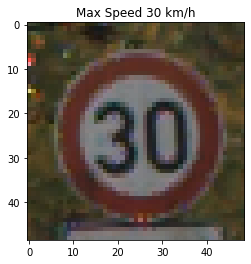

SHAPE:  (49, 49, 3)


array([[[0.24, 0.26, 0.19],
        [0.22, 0.25, 0.18],
        [0.17, 0.21, 0.13],
        ...,
        [0.22, 0.22, 0.14],
        [0.26, 0.26, 0.18],
        [0.27, 0.26, 0.17]],

       [[0.12, 0.13, 0.1 ],
        [0.11, 0.14, 0.1 ],
        [0.11, 0.16, 0.11],
        ...,
        [0.21, 0.21, 0.14],
        [0.24, 0.24, 0.17],
        [0.25, 0.25, 0.18]],

       [[0.28, 0.28, 0.2 ],
        [0.33, 0.35, 0.24],
        [0.25, 0.3 , 0.2 ],
        ...,
        [0.22, 0.2 , 0.13],
        [0.21, 0.21, 0.15],
        [0.22, 0.23, 0.16]],

       ...,

       [[0.29, 0.24, 0.15],
        [0.24, 0.2 , 0.13],
        [0.21, 0.18, 0.12],
        ...,
        [0.35, 0.26, 0.17],
        [0.32, 0.26, 0.16],
        [0.29, 0.25, 0.15]],

       [[0.32, 0.26, 0.16],
        [0.26, 0.22, 0.15],
        [0.22, 0.19, 0.13],
        ...,
        [0.35, 0.31, 0.23],
        [0.27, 0.23, 0.14],
        [0.28, 0.24, 0.14]],

       [[0.28, 0.23, 0.13],
        [0.27, 0.24, 0.16],
        [0.23, 0

In [ ]:
index = 1535

PlotPicture(x_train, y_train_names, index)
print('SHAPE: ', x_train[index].shape)
x_train[index]

Resize **x_train**

In [ ]:
if "all_train_images_resized.npy" in os.listdir(data_dir + "numpy/"):
  x_train = Recover_x_train()

else:

  # Resize images:
  x_train = np.array([ resize(image, (img_width, img_height)) for image in x_train])

  # Round up to two decimal places:
  for i in range(len(x_train)):
    x_train[i] = np.around(x_train[i], decimals = 2)


  #np.save(numpy_dir + "all_train_images_resized.npy" , x_train_resized)

**Note**: Resized x_train pictures are not yet saved to checkpoint file as they still need to be split between train and validation sets.

Visualize **training** pictures after resizing:

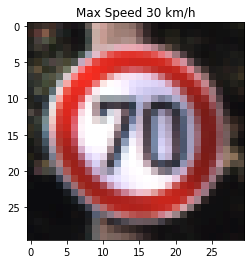

SHAPE:  (30, 30, 3)


array([[[0.16, 0.14, 0.12],
        [0.21, 0.17, 0.15],
        [0.25, 0.2 , 0.18],
        ...,
        [0.08, 0.08, 0.08],
        [0.1 , 0.1 , 0.08],
        [0.13, 0.13, 0.1 ]],

       [[0.2 , 0.14, 0.12],
        [0.35, 0.22, 0.21],
        [0.51, 0.36, 0.29],
        ...,
        [0.07, 0.07, 0.07],
        [0.08, 0.08, 0.08],
        [0.08, 0.08, 0.07]],

       [[0.14, 0.14, 0.12],
        [0.28, 0.25, 0.24],
        [0.32, 0.33, 0.28],
        ...,
        [0.07, 0.06, 0.07],
        [0.06, 0.06, 0.07],
        [0.07, 0.07, 0.06]],

       ...,

       [[0.06, 0.06, 0.07],
        [0.08, 0.08, 0.09],
        [0.07, 0.07, 0.07],
        ...,
        [0.06, 0.05, 0.06],
        [0.05, 0.05, 0.06],
        [0.06, 0.06, 0.06]],

       [[0.05, 0.05, 0.07],
        [0.06, 0.06, 0.07],
        [0.07, 0.07, 0.07],
        ...,
        [0.06, 0.05, 0.06],
        [0.05, 0.05, 0.06],
        [0.06, 0.05, 0.06]],

       [[0.06, 0.06, 0.07],
        [0.05, 0.05, 0.06],
        [0.06, 0

In [ ]:
# Test x_train after resizing
index = 1535

PlotPicture(x_train, y_train_names, index)
print('SHAPE: ', x_train[index].shape)
x_train[index]

***

Resize **x_test** --> **X_test** (final version)

Repeat operations for the **test** dataset:
Resize the whole test dataset:

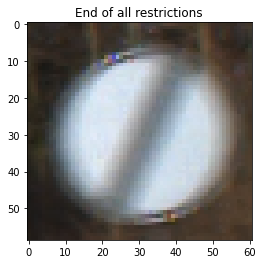

SHAPE:  (59, 61, 3)


In [ ]:
index = 2345
PlotPicture(x_test, y_test_names, index)
print('SHAPE: ', x_test[index].shape)

In [ ]:
# Normalize:

x_test = x_test/255

# Round up to two decimal places:

for i in range(len(x_test)):
  x_test[i] = np.around(x_test[i], decimals = 2)

In [ ]:
if "all_test_images_resized.npy" in os.listdir(data_dir + "numpy/"):
  X_test = Recover_X_test()

else:

  # Resize images:
  X_test = np.array([resize(image, (img_width, img_height)) for image in x_test])

  # Round values up to two decimal places before saving:
  for i in range(len(X_test)):
    X_test[i] = np.around(X_test[i], decimals = 2)

  # Save to checkpoint file:
  np.save(numpy_dir + "all_test_images_resized.npy" , X_test)

X_test recovered


In [ ]:
# For naming-convention consistency:
Y_test = y_test
Y_test_names = y_test_names

Check **test** pictures after resizing:

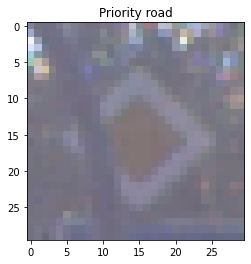

SHAPE:  (30, 30, 3) LABEL:  Priority road


array([[[0.51, 0.51, 0.6 ],
        [0.45, 0.45, 0.51],
        [0.45, 0.44, 0.53],
        ...,
        [0.51, 0.49, 0.59],
        [0.46, 0.46, 0.5 ],
        [0.5 , 0.52, 0.53]],

       [[0.63, 0.67, 0.8 ],
        [0.46, 0.47, 0.53],
        [0.44, 0.43, 0.52],
        ...,
        [0.48, 0.49, 0.58],
        [0.46, 0.5 , 0.52],
        [0.5 , 0.54, 0.53]],

       [[0.96, 0.96, 0.97],
        [0.59, 0.63, 0.7 ],
        [0.41, 0.44, 0.52],
        ...,
        [0.48, 0.49, 0.51],
        [0.52, 0.52, 0.52],
        [0.58, 0.58, 0.56]],

       ...,

       [[0.47, 0.45, 0.5 ],
        [0.46, 0.45, 0.51],
        [0.47, 0.46, 0.51],
        ...,
        [0.47, 0.48, 0.54],
        [0.48, 0.48, 0.54],
        [0.48, 0.48, 0.54]],

       [[0.45, 0.45, 0.5 ],
        [0.47, 0.47, 0.53],
        [0.45, 0.45, 0.52],
        ...,
        [0.45, 0.47, 0.56],
        [0.45, 0.47, 0.57],
        [0.46, 0.48, 0.57]],

       [[0.44, 0.45, 0.51],
        [0.46, 0.46, 0.52],
        [0.42, 0

In [ ]:
# Check x_test
index = 1485

PlotPicture(X_test, y_test_names, index)
print('SHAPE: ', X_test[index].shape, 'LABEL: ', class_names[y_test[index]])
X_test[index]

### 2.1.2 Shuffle train pictures
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Shuffle train pictures:

shuffle_indexes = np.arange(x_train.shape[0])
np.random.shuffle(shuffle_indexes)

x_train = x_train[shuffle_indexes]
y_train = y_train[shuffle_indexes]


### 2.1.3 Split training set into train and validation set
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In [ ]:
validation_split_files = ["all_train_images_split.npy", "all_val_images_split.npy", "all_train_labels_split.npy", "all_val_labels_split.npy"]

# Will only attempt to load the checkpoint files for the train and validation split if the four legs of the split are present:

if all([file in os.listdir(data_dir + "numpy/") for file in validation_split_files]):
  X_train = Recover_X_train()
  X_val = Recover_X_val()
  Y_train = Recover_Y_train()
  Y_val = Recover_Y_val()

else:

  # Split the train data into train and validation set:

  X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42, shuffle=True)

  np.save(numpy_dir + "all_train_images_split.npy" , X_train)
  np.save(numpy_dir + "all_train_labels_split.npy" , Y_train)
  np.save(numpy_dir + "all_val_images_split.npy" , X_val)
  np.save(numpy_dir + "all_val_labels_split.npy" , Y_val)

  print("X_train.shape", X_train.shape)
  print("X_valid.shape", X_val.shape)
  print("y_train.shape", Y_train.shape)
  print("y_valid.shape", Y_val.shape)


Y_train_names = [class_names[label] for label in Y_train] # names array needs rebuilding from the category-codes array Y_val
Y_val_names = [class_names[label] for label in Y_val]

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


Trial cell to check picture loading:

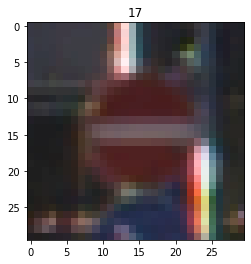

SHAPE:  (30, 30, 3) LABEL:  Do not enter


array([[[0.22, 0.22, 0.27],
        [0.22, 0.22, 0.25],
        [0.22, 0.23, 0.27],
        ...,
        [0.13, 0.12, 0.15],
        [0.13, 0.13, 0.16],
        [0.12, 0.13, 0.15]],

       [[0.22, 0.22, 0.27],
        [0.22, 0.22, 0.26],
        [0.22, 0.23, 0.27],
        ...,
        [0.12, 0.11, 0.15],
        [0.13, 0.13, 0.16],
        [0.13, 0.13, 0.16]],

       [[0.22, 0.23, 0.28],
        [0.22, 0.23, 0.26],
        [0.22, 0.23, 0.27],
        ...,
        [0.12, 0.11, 0.15],
        [0.15, 0.14, 0.16],
        [0.14, 0.13, 0.15]],

       ...,

       [[0.22, 0.14, 0.12],
        [0.31, 0.22, 0.22],
        [0.43, 0.31, 0.31],
        ...,
        [0.32, 0.28, 0.24],
        [0.41, 0.32, 0.24],
        [0.43, 0.3 , 0.29]],

       [[0.2 , 0.16, 0.16],
        [0.3 , 0.24, 0.24],
        [0.39, 0.33, 0.35],
        ...,
        [0.2 , 0.19, 0.15],
        [0.27, 0.24, 0.16],
        [0.25, 0.18, 0.13]],

       [[0.13, 0.12, 0.13],
        [0.13, 0.12, 0.12],
        [0.13, 0

In [ ]:
index = 12777


PlotPicture(X_train, Y_train, index)
print('SHAPE: ', X_train[index].shape, 'LABEL: ', class_names[Y_train[index]])
X_train[index]

## 2.2 Literature Review 
<a class="anchor" id="2_2"></a>
#### [Return to index](#main_title)

<br/>
<br/>
Data review and justification for choosing the model below will be detailed in the Markdown report.
<br/>
<br/>

***
# 3 Implementation + results 
<a class="anchor" id="3"></a>
#### [Return to index](#main_title)

## 3.0 Define model functions
<a class="anchor" id="3_1"></a>
#### [Return to index](#main_title)

Define functions to handle the models implemented during this section.

In [ ]:
# Generate a timestamp string that will be used as model name when saving to file:

def GetNowString():
  '''
  Uses datetime to return a timestamp string in the format DDMMYYYY_HHMMSS
  '''
  return datetime.now().strftime("%d/%m/%Y").replace("/","") + "_" + datetime.now().strftime("%X").replace(":","")


# Generate a model report:

def ModelReport(model, X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs = 30, optimizer = "sgd", callbacks=True, save_model = True, save_history = True, history_dict = False):
  
  '''
  Given a Keras model, a train, validation and test set, returns a model summary, history object and evaluation results.

    Params:
    model, X_train, Y_train, X_val, Y_val, X_test, Y_test: train, validation and test set, and Kera's model
    epochs = 30, optimizer = "sgd": Train and compile parameters fed into the model. 
    callbacks=True, save_model = True, save_history = True: Save model using a timestamp name.
    history_dict = False

    Returns:
    summary, history, evaluation: Kera's model summary, history object and evaluation results
  '''

  now = GetNowString()

    # Saving model & history:
  if save_model or save_history:
    model_name = saved_models_dir + now
    history_name = saved_history_dir + now
    
  if callbacks:
    history_logger_name = saved_csv_logger_dir + now + ".csv"
    history_logger=tf.keras.callbacks.CSVLogger(history_logger_name, separator=",", append=True)
    callbacks = [history_logger]
    print("\nCallbacks csv file started: ", history_logger_name, "\n")
  
  else:
    callbacks = None

  # Print summary:
  summary = model.summary()

  # Compile using input optimizer. Default is "sgd":
  model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

  # Starts training creating a history object:
  history = model.fit(X_train, Y_train, epochs = epochs, callbacks = callbacks, validation_data=(X_val, Y_val))

  # Performs evaluation against Test set (X_test, Y_test):
  evaluation = model.evaluate(X_test, Y_test)

  # Perform saving operations:
  if save_model:
    model.save(model_name)
    print('\nModel saved to: ', model_name)

  if save_history:
    
    if history_dict: # Saving history dict only (history_dict = True)
      np.save(history_name + ".npy" , history.history)
      print('\nHistory dict saved to: ', history_name + ".npy")
      
    else:
      with open(history_name + ".obj", "wb+") as file:
        pickle.dump(history, file) # Dumping whole history object

      print('\nHistory object saved to: ', history_name + ".obj")
    
  return summary, history, evaluation



def PlotHistory(history, history_dict = False):

  '''
  Shows training history from a model fitting, using a history object.
  Plots accuracy and loss from training and validation sets, per epoch.

  Params:
    history: History object or History dict (history.history), depending on second parameter history_dict boolean value.

  '''
  
  if history_dict:
    pd.DataFrame(history).plot(figsize=(8, 5))   # history dict (np.save + np.load with .item()):

  else:
    pd.DataFrame(history.history).plot(figsize=(8, 5))   # history object (pickle):

  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()

  return None



def PlotPrediction(model, X_test, Y_test_names):

  '''
  Uses Kera's model.predict() to create predictions from a given model, using 25 pictures from a test set.

  Params:
    model, X_test, Y_test_names: Kera's model and a test set with its corresponding labels.

  '''

  pred = model.predict(X_test) 
  classes_x = np.argmax(pred,axis=1)

  plt.figure(figsize = (25, 25))

  start_index = 0

  for i in range(25):

      plt.subplot(5, 5, i + 1)
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])

      prediction = class_names[classes_x[start_index + i]]
      actual = Y_test_names[start_index + i]

      col = 'g'

      if prediction != actual:
          col = 'r'

      # Single line label:    
      #plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
      # Multi line label:
      plt.xlabel('Actual={} \n Pred={}'.format(actual, prediction), color = col)


      plt.imshow(X_test[start_index + i])

  plt.show()

  return None






  # DEBUGGING FUNCTIONS:

def SavePickleObject(filepath, object):

  '''
  Save a python object as a binary file using Python's Pickle.
  '''
  with open(filepath + ".obj", "wb+") as file:
    pickle.dump(object, file) # Note: Saving history dict (history.history) with Pickle does NOT require .item() when loading with np.load
  
  return None 


def LoadPickleObject(filepath):

  '''
  Load a python object from a binary file previously saved with Python's Pickle.
  '''
  with open(filepath, 'rb') as file:
    object_reloaded = pickle.load(file)
  
  # Load numpy's binary object using np.load: np.load(filepath, allow_pickle = True).item()
  
  return object_reloaded


def RecoverModelHistory(model_name, history_name = None, history_dict = False):

  '''
  Recover a Kera's model and a history dict previously saved with Kera's model.save()

  '''

  model = tf.keras.models.load_model( saved_models_dir + model_name)

  try:

    if history_dict:
      history = np.load(saved_history_dir + history_name, allow_pickle='TRUE').item() # history.history (dict) saved with np.save
    
    else:
      with open(saved_history_dir + history_name, 'rb') as file: # whole history object saved with pickle:
        history = pickle.load(file)

    return model, history
  
  except:
    return model
  

In [ ]:
#model.save(folderpath)
#model_recovered = tf.keras.models.load_model(folderpath)

## 3.1 Model implementation 
<a class="anchor" id="3_1"></a>
#### [Return to index](#main_title)

### 3.1.1 CNN Architecture  
<a class="anchor" id="3_1_1"></a>
#### [Return to index](#main_title)

In our first model ( _**model**_ ), we will run a classic CNN architecture made by 2 steps of convolutional layers, followed by a flatten layer. The activation functions on the first attempt will be ReLU to reduce computation times, as this is our first attempt.


In [ ]:
# Create a CNN model:

model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(img_height, img_width, channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])


In [ ]:
lenet_5_model = keras.models.Sequential([
                                         
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(30, 30, 3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2

    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4

    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5

    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
model_alexnet_original = keras.models.Sequential([                                 
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

## 3.2 Model training and parameter tuning
<a class="anchor" id="3_2"></a>
#### [Return to index](#main_title)

## 3.3 Performance review
<a class="anchor" id="3_3"></a>
#### [Return to index](#main_title)

## Optimizers loop:

In [ ]:
from keras import optimizers as opt
from collections import defaultdict


optimizers = {"RMSprop": {"optimizer": tf.keras.optimizers.RMSprop(), "color":"blue"},
              "adam_01": {"optimizer": tf.keras.optimizers.Adam(learning_rate=0.01),"color":"red"},
              "sgd": {"optimizer": tf.keras.optimizers.SGD(), "color":"purple"},
              "adadelta": {"optimizer": tf.keras.optimizers.Adadelta(), "color":"pink"},
              "adagrad": {"optimizer": tf.keras.optimizers.Adagrad(), "color":"yellow"}}


results = dict.fromkeys(optimizers.keys())

for optimizer, d in optimizers.items():
    print("\n\n", f'Testing {optimizer}')

    summary, history, evaluation = ModelReport(model, X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs=5, optimizer=d['optimizer'], callbacks=False, save_model=False, save_history=False, history_dict=False)

    results[str(optimizer)] = {'history': history, 'evaluation' : evaluation}





 Testing RMSprop
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9

In [ ]:
results

{'RMSprop': {'evaluation': [0.15582384169101715, 0.9830561876296997],
  'history': <keras.callbacks.History at 0x7fe26dd3c850>},
 'adadelta': {'evaluation': [0.37929388880729675, 0.9773554801940918],
  'history': <keras.callbacks.History at 0x7fe26806aa90>},
 'adagrad': {'evaluation': [0.3784712553024292, 0.9779097437858582],
  'history': <keras.callbacks.History at 0x7fe267eb9d10>},
 'adam_01': {'evaluation': [0.5930328369140625, 0.9642913937568665],
  'history': <keras.callbacks.History at 0x7fe265e4fe90>},
 'sgd': {'evaluation': [0.3854586184024811, 0.9771971702575684],
  'history': <keras.callbacks.History at 0x7fe265c357d0>}}

In [ ]:
filepath = data_dir + "objects/results_" + GetNowString()
SavePickleObject(filepath, results)

INFO:tensorflow:Assets written to: ram://949832fb-82c8-418f-83e3-dddb0725a83f/assets


In [ ]:
filepath2 = data_dir + "objects/results_20032022_234555.obj"
results2 = LoadPickleObject(filepath2)

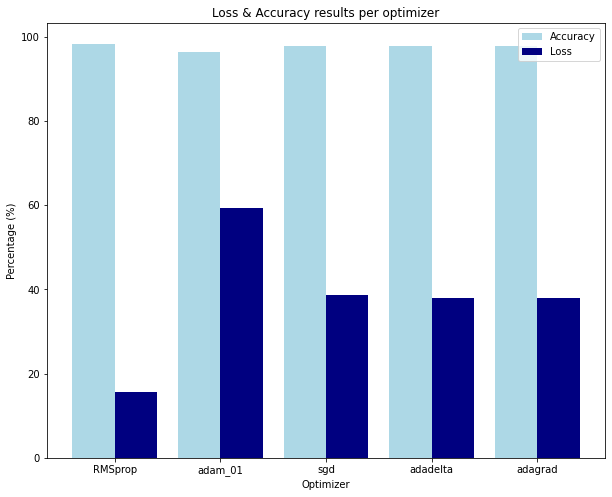

In [ ]:
loss = [ round(results[key]['evaluation'][0]*100 , 2) for key in results ]
accuracy = [ round(results[key]['evaluation'][1]*100 , 2) for key in results ]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
# Make your chart here

#t = 2 # There are two sets of data: A and B
#w = 0.8 # We generally want bars to be 0.8
#n = 1 # A is first set of data
#d = 5 # There are 5 topics we're plotting

accuracy_x = create_x(2, 0.8, 1, 5)
loss_x = create_x(2, 0.8, 2, 5)

#middle_x = [x-1 for x in accuracy]
middle_x = [ (a + b) / 2.0 for a, b in zip(accuracy_x, loss_x)]


fig = plt.figure(figsize=(10,8))
ax=plt.subplot()

plt.bar(accuracy_x, accuracy, color = "lightblue")
#ax = sns.barplot(accuracy_x, accuracy, palette="Blues_d")

plt.bar(loss_x, loss, color = "navy")
#ax = sns.barplot(loss_x, loss, palette="Blues_d")


ax.set_xticks(middle_x) # using MIDDLE_X calculated above to locate xtick LABELS
ax.set_xticklabels(results.keys()) # labels we want to put on the x ticks

plt.legend(["Accuracy", "Loss"])

plt.title('Loss & Accuracy results per optimizer')
plt.xlabel('Optimizer')
plt.ylabel('Percentage (%)')



plt.show()
